<a href="https://colab.research.google.com/github/jaham954012/bigdata/blob/main/1217.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
install.packages("SportsAnalytics")
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
library(SportsAnalytics)
NBA1516<-fetch_NBAPlayerStatistics("15-16")

`geom_smooth()` using formula 'y ~ x'



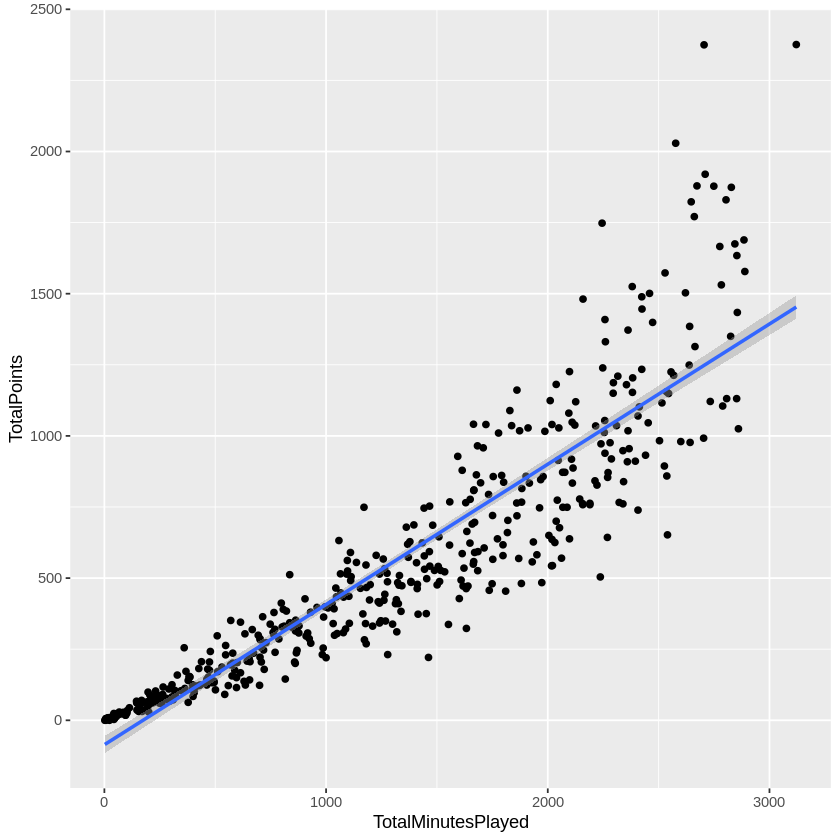

In [4]:
library(ggplot2)
ggplot(NBA1516,aes(x=TotalMinutesPlayed,y=TotalPoints))+
geom_point()+geom_smooth(method = "glm")

In [5]:
lm(TotalPoints~TotalMinutesPlayed,data=NBA1516)


Call:
lm(formula = TotalPoints ~ TotalMinutesPlayed, data = NBA1516)

Coefficients:
       (Intercept)  TotalMinutesPlayed  
          -85.9071              0.4931  


In [6]:
glm(TotalPoints~TotalMinutesPlayed+FieldGoalsAttempted,data=NBA1516)



Call:  glm(formula = TotalPoints ~ TotalMinutesPlayed + FieldGoalsAttempted, 
    data = NBA1516)

Coefficients:
        (Intercept)   TotalMinutesPlayed  FieldGoalsAttempted  
         -1.799e+01           -2.347e-04            1.256e+00  

Degrees of Freedom: 475 Total (i.e. Null);  473 Residual
Null Deviance:	    99360000 
Residual Deviance: 2160000 	AIC: 5367

In [7]:
mydata <- read.csv("https://ncku.ml/WZZQ")

In [8]:
head(mydata)

,admit,gre,gpa,rank
,<int>,<int>,<dbl>,<int>
1,0,380,3.61,3
2,1,660,3.67,3
3,1,800,4.00,1
4,1,640,3.19,4
5,0,520,2.93,4
6,1,760,3.00,2


In [9]:
mydata$rank<-factor(mydata$rank)
mylogit <- glm(admit ~ gre + gpa + rank,

data = mydata, family = "binomial")

sum<-summary(mylogit)
sum$coefficients

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-3.989979073,1.139950936,-3.500132,0.0004650273
gre,0.002264426,0.001093998,2.069864,0.0384651284
gpa,0.804037549,0.331819298,2.423119,0.0153878974
rank2,-0.675442928,0.316489661,-2.134171,0.0328288188
rank3,-1.340203916,0.345306418,-3.881202,0.0001039415
rank4,-1.551463677,0.417831633,-3.713131,0.0002047107


In [10]:
OneVar<-glm(TotalPoints~TotalMinutesPlayed,data =NBA1516)
TwoVar<-glm(TotalPoints~TotalMinutesPlayed+FieldGoalsAttempted,

data =NBA1516)

ThreeVar<-glm(TotalPoints~TotalMinutesPlayed+FieldGoalsAttempted+Position,

data =NBA1516)

c(OneVar$aic,TwoVar$aic,ThreeVar$aic)

[1] 6338.913 5366.763 5321.972

In [11]:
sum2<-summary(TwoVar)
sum2$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-1.798855e+01,5.659758251,-3.17832538,1.578333e-03
TotalMinutesPlayed,-2.347183e-04,0.009474631,-0.02477334,9.802462e-01
FieldGoalsAttempted,1.255794e+00,0.022239494,56.46682752,2.474028e-212


In [12]:
sum3<-summary(ThreeVar)
sum3$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),22.852222668,9.014714391,2.5349913,1.156964e-02
TotalMinutesPlayed,-0.006536874,0.009199968,-0.7105322,4.777281e-01
FieldGoalsAttempted,1.275721212,0.021647176,58.9324535,1.144607e-218
PositionPF,-39.416326742,9.936541704,-3.9668053,8.425605e-05
PositionPG,-65.034646215,10.269250388,-6.3329497,5.648565e-10
PositionSF,-38.522298887,10.488170409,-3.6729284,2.674727e-04
PositionSG,-52.175143670,9.985331185,-5.2251791,2.625062e-07


In [13]:
install.packages("rpart")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [14]:
library(rpart)
DT<-rpart(Position~Blocks+ThreesMade+Assists+Steals,data=NBA1516)
DT

n=475 (1 observation deleted due to missingness)

node), split, n, loss, yval, (yprob)
      * denotes terminal node

  1) root 475 364 PF (0.15 0.23 0.21 0.18 0.23)  
    2) ThreesMade< 2.5 132  74 C (0.44 0.35 0.098 0.053 0.061)  
      4) Blocks>=4.5 89  37 C (0.58 0.38 0.011 0.011 0.011) *
      5) Blocks< 4.5 43  31 PF (0.14 0.28 0.28 0.14 0.16)  
       10) Steals< 2.5 29  19 PF (0.17 0.34 0.14 0.21 0.14) *
       11) Steals>=2.5 14   6 PG (0.071 0.14 0.57 0 0.21) *
    3) ThreesMade>=2.5 343 242 SG (0.035 0.19 0.25 0.23 0.29)  
      6) Assists>=170.5 96  39 PG (0.031 0.052 0.59 0.15 0.18) *
      7) Assists< 170.5 247 163 SG (0.036 0.24 0.12 0.26 0.34)  
       14) Blocks>=20.5 80  42 PF (0.062 0.48 0 0.26 0.2)  
         28) Steals< 59.5 58  21 PF (0.069 0.64 0 0.14 0.16) *
         29) Steals>=59.5 22   9 SF (0.045 0.045 0 0.59 0.32) *
       15) Blocks< 20.5 167  99 SG (0.024 0.13 0.17 0.26 0.41)  
         30) Assists< 81.5 110  68 SG (0.027 0.18 0.091 0.32 0.38)  
        

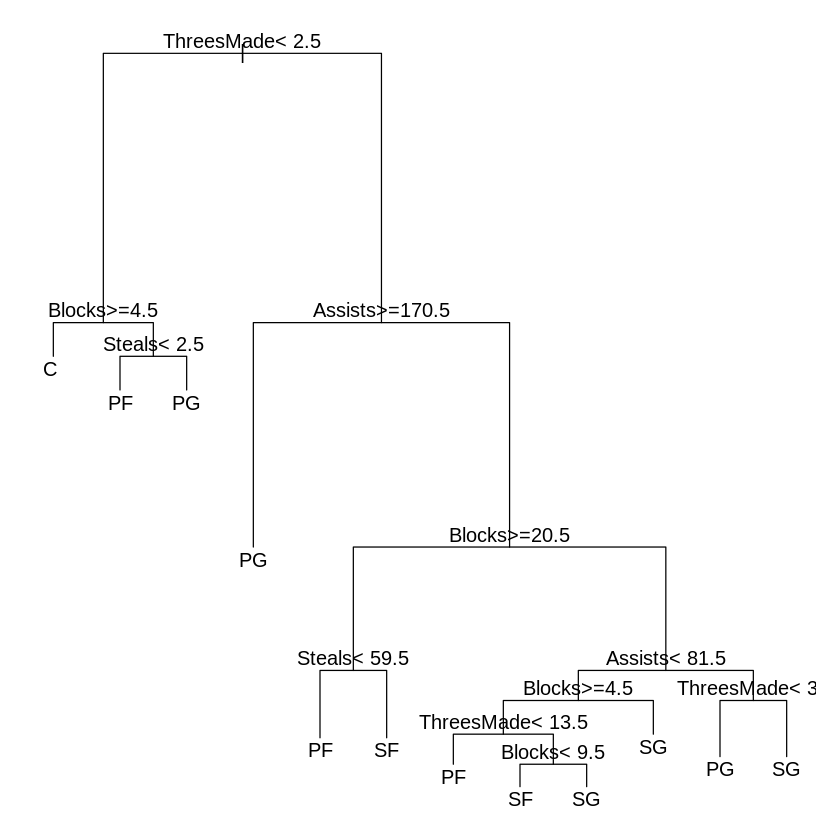

In [15]:
par(mfrow=c(1,1), mar = rep(1,4)) #下,左,上,右
plot(DT)
text(DT, use.n=F, all=F, cex=1)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



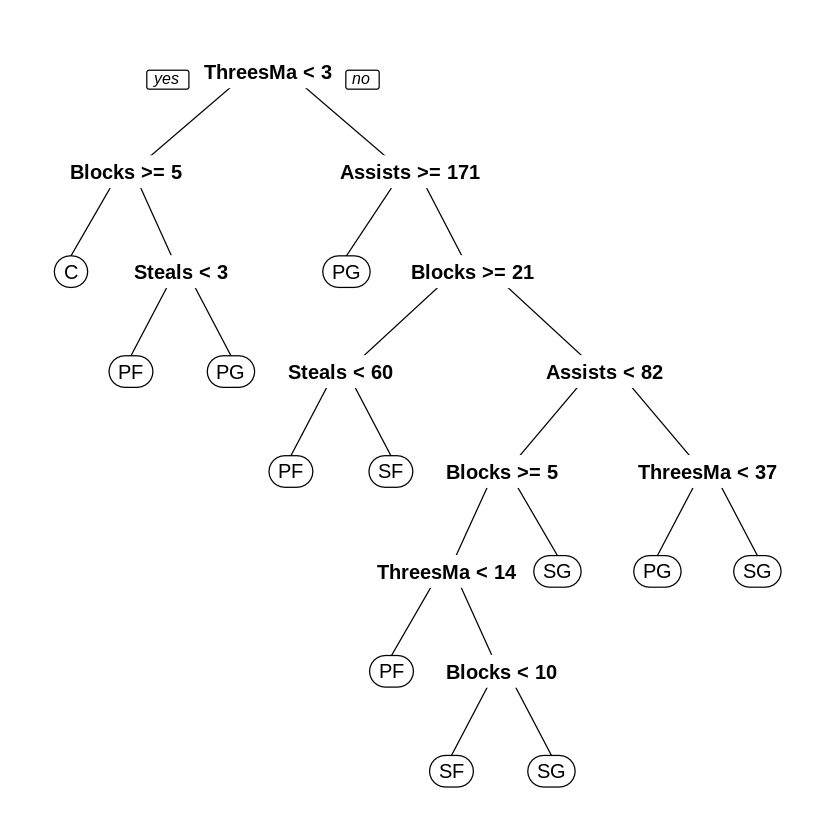

In [16]:
 install.packages("rpart.plot")
 library(rpart.plot)
prp(DT)

In [17]:
mtcars.mxs<-as.matrix(mtcars)
d<-dist(mtcars.mxs) #預設為euclidean
head(d)

[1]   0.6153251  54.9086059  98.1125212 210.3374396  65.4717710 241.4076490

In [18]:
d<-dist(mtcars.mxs, method="manhattan") #計算manhattan距離
head(d)

[1]   0.815  79.300 108.795 275.430  84.640 347.960

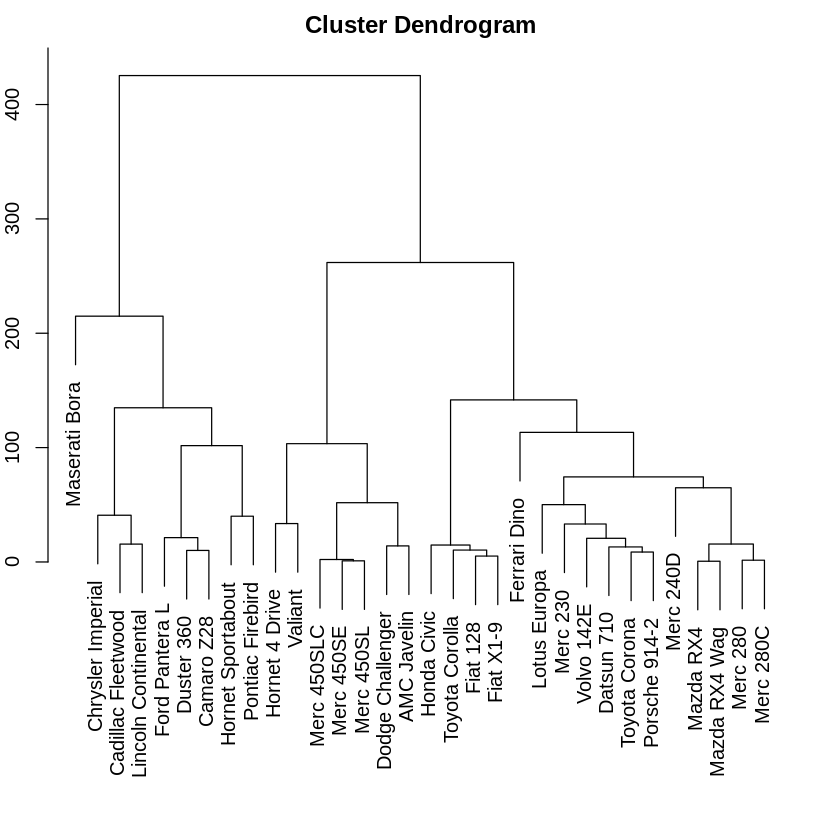

In [19]:
par(mar=rep(2,4),mfrow=c(1,1))
hc<-hclust(dist(mtcars.mxs)) #可用method參數設定聚合方法,預設為complete
plot(hc)

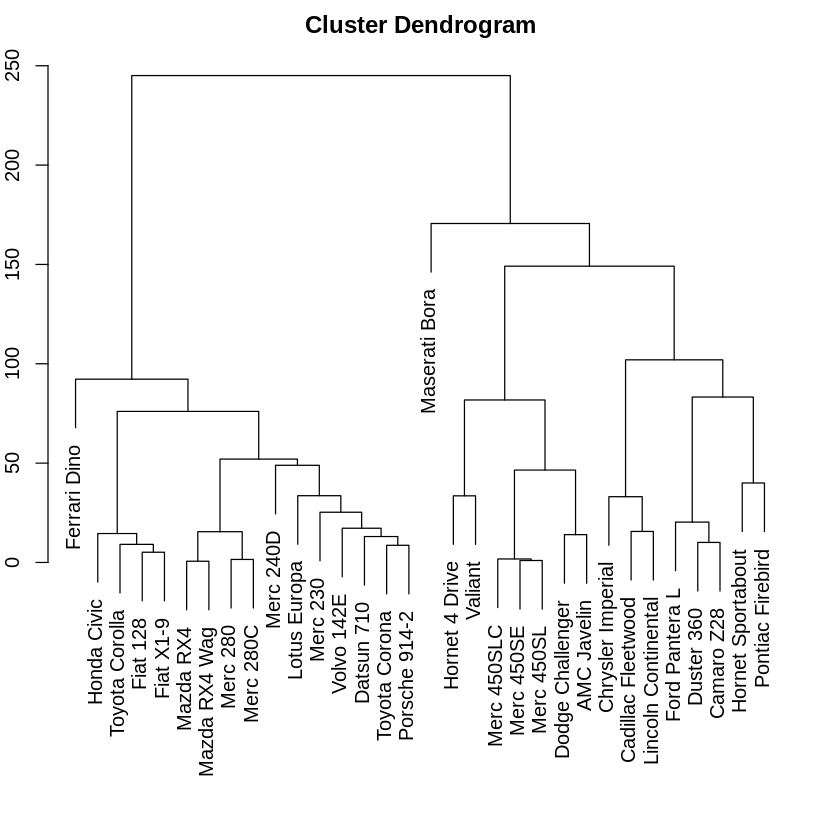

In [20]:
par(mar=rep(2,4),mfrow=c(1,1))
hc<-hclust(dist(mtcars.mxs),method="average") #聚合方法為計算平均距離
plot(hc)

In [21]:
clusterCut <- cutree(hc, k=5) #分5群
sort(clusterCut)

Mazda RX4       Mazda RX4 Wag          Datsun 710           Merc 240D 
                  1                   1                   1                   1 
           Merc 230            Merc 280           Merc 280C            Fiat 128 
                  1                   1                   1                   1 
        Honda Civic      Toyota Corolla       Toyota Corona           Fiat X1-9 
                  1                   1                   1                   1 
      Porsche 914-2        Lotus Europa        Ferrari Dino          Volvo 142E 
                  1                   1                   1                   1 
     Hornet 4 Drive             Valiant          Merc 450SE          Merc 450SL 
                  2                   2                   2                   2 
        Merc 450SLC    Dodge Challenger         AMC Javelin   Hornet Sportabout 
                  2                   2                   2                   3 
         Duster 360          Camaro Z28    Pontiac Firebird      Ford Pantera L 
                  3                   3                   3                   3 
 Cadillac Fleetwood Lincoln Continental   Chrysler Imperial       Maserati Bora 
                  4                   4                   4                   5

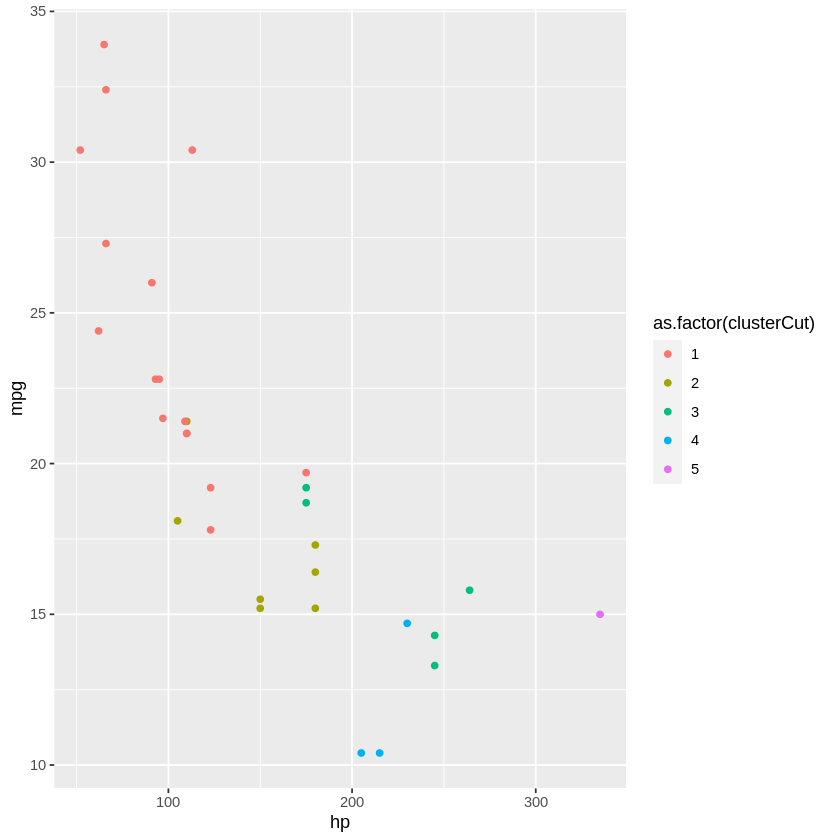

In [22]:
ggplot()+geom_point(data=mtcars,

aes(x=hp,y=mpg,color=as.factor(clusterCut)))

In [23]:
clusterCut <- cutree(hc,h =4) #切在高度=4的地方(距離=4)
sort(clusterCut)

Mazda RX4       Mazda RX4 Wag          Datsun 710      Hornet 4 Drive 
                  1                   1                   2                   3 
  Hornet Sportabout             Valiant          Duster 360           Merc 240D 
                  4                   5                   6                   7 
           Merc 230            Merc 280           Merc 280C          Merc 450SE 
                  8                   9                   9                  10 
         Merc 450SL         Merc 450SLC  Cadillac Fleetwood Lincoln Continental 
                 10                  10                  11                  12 
  Chrysler Imperial            Fiat 128         Honda Civic      Toyota Corolla 
                 13                  14                  15                  16 
      Toyota Corona    Dodge Challenger         AMC Javelin          Camaro Z28 
                 17                  18                  19                  20 
   Pontiac Firebird           Fiat X1-9       Porsche 914-2        Lotus Europa 
                 21                  22                  23                  24 
     Ford Pantera L        Ferrari Dino       Maserati Bora          Volvo 142E 
                 25                  26                  27                  28

ERROR: ignored

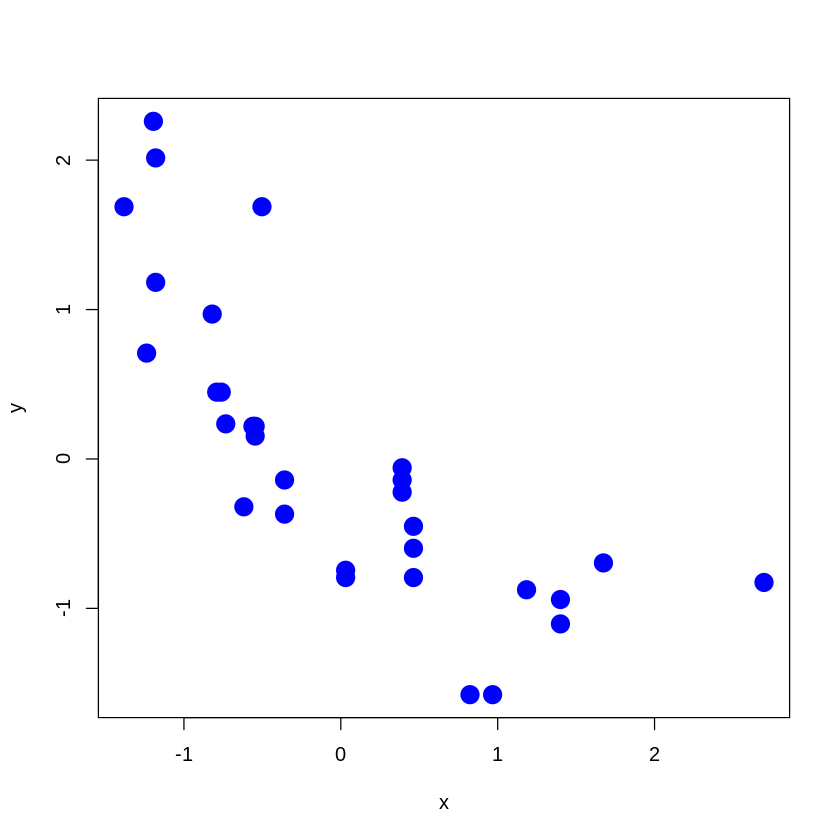

In [24]:
x<-scale(mtcars$hp[-1]);y<-scale(mtcars$mpg[-1])
plot(x,y,col="blue",pch=19,cex=2)
text(x+0.05,y+0.05,labels=labelCar)

In [25]:
dataFrame <- data.frame(x,y)
kmeansObj <- kmeans(dataFrame,centers=3)
names(kmeansObj)

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"

In [26]:
kmeansObj$cluster

[1] 3 2 3 3 3 1 2 2 3 3 3 3 3 1 1 1 2 2 2 3 3 3 1 3 2 2 2 1 3 1 3

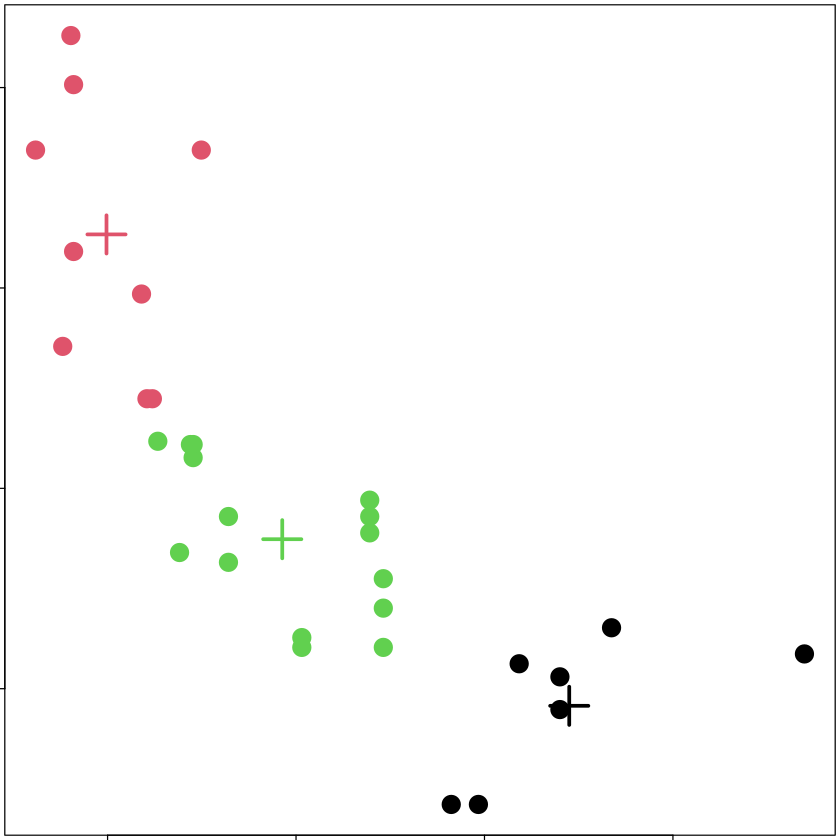

In [27]:
par(mar=rep(0.2,4))
plot(x,y,col=kmeansObj$cluster,pch=19,cex=2)
points(kmeansObj$centers,col=1:3,pch=3,cex=3,lwd=3)

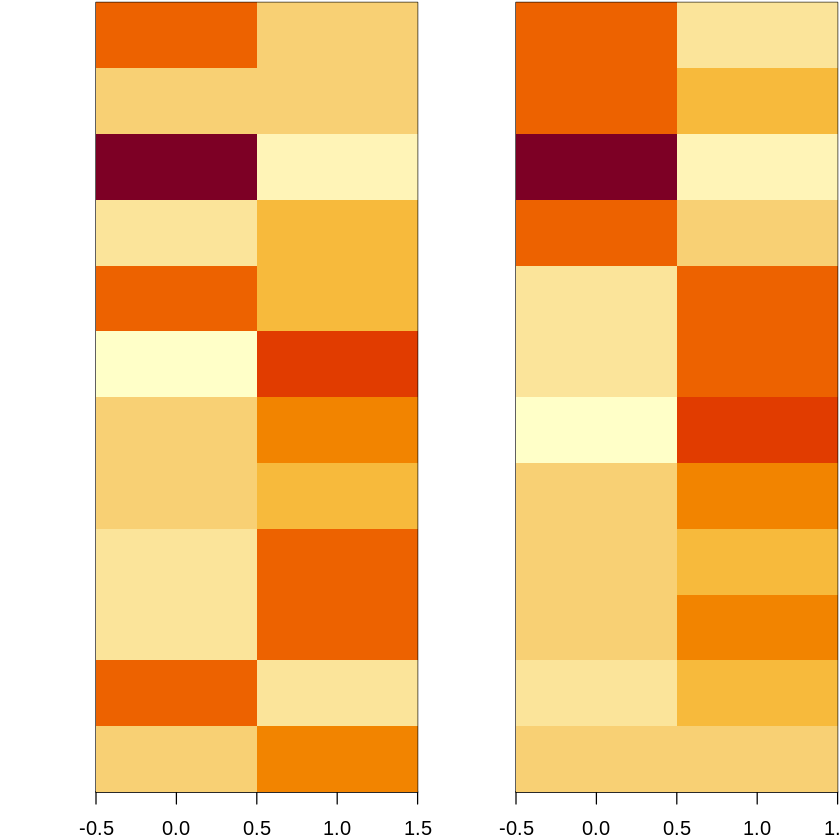

In [28]:
set.seed(1234)
dataMatrix <- as.matrix(dataFrame)[sample(1:12),]
kmeansObj <- kmeans(dataMatrix,centers=3)
par(mfrow=c(1,2), mar = c(2, 4, 0.1, 0.1))
image(t(dataMatrix)[,nrow(dataMatrix):1],yaxt="n")
image(t(dataMatrix)[,order(kmeansObj$cluster)],yaxt="n")

In [29]:
if (!require('arules')){
install.packages("arules");
library(arules) #for Apriori演算法
}
if (!require('datasets')){
install.packages("datasets");
library(datasets) #for Groceries data
}
data(Groceries)

Loading required package: arules

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘arules’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: Matrix


Attaching package: ‘arules’


The following objects are masked from ‘package:base’:

    abbreviate, write




In [30]:
rules <- apriori(Groceries, # data= Groceries

parameter = list(supp = 0.001, conf = 0.8), #參數最低限度
control = list(verbose=F)) #不要顯示output

options(digits=2) # Only 2 digits
inspect(rules[1:5]) # Show the top 5 rules

    lhs                        rhs            support confidence coverage lift
[1] {liquor,red/blush wine} => {bottled beer} 0.0019  0.90       0.0021   11.2
[2] {curd,cereals}          => {whole milk}   0.0010  0.91       0.0011    3.6
[3] {yogurt,cereals}        => {whole milk}   0.0017  0.81       0.0021    3.2
[4] {butter,jam}            => {whole milk}   0.0010  0.83       0.0012    3.3
[5] {soups,bottled beer}    => {whole milk}   0.0011  0.92       0.0012    3.6
    count
[1] 19   
[2] 10   
[3] 17   
[4] 10   
[5] 11   


In [31]:
rules<-sort(rules, by="confidence", decreasing=TRUE) #按照confidence排序
inspect(rules[1:5]) # Show the top 5 rules

    lhs                     rhs          support confidence coverage lift count
[1] {rice,                                                                     
     sugar}              => {whole milk}  0.0012          1   0.0012  3.9    12
[2] {canned fish,                                                              
     hygiene articles}   => {whole milk}  0.0011          1   0.0011  3.9    11
[3] {root vegetables,                                                          
     butter,                                                                   
     rice}               => {whole milk}  0.0010          1   0.0010  3.9    10
[4] {root vegetables,                                                          
     whipped/sour cream,                                                       
     flour}              => {whole milk}  0.0017          1   0.0017  3.9    17
[5] {butter,                                                                   
     soft cheese,                       

In [33]:
rulesR<-apriori(data=Groceries, parameter=list(supp=0.001,conf = 0.08),
appearance = list(default="lhs",rhs="rice"), #設定右邊一定要是牛奶
control = list(verbose=F)) #不要顯示output
rulesR<-sort(rulesR, decreasing=TRUE,by="confidence") #按照confidence排序
inspect(rulesR[1:5]) # Show the top 5 rules

    lhs                        rhs    support confidence coverage lift count
[1] {root vegetables,                                                       
     other vegetables,                                                      
     whole milk,                                                            
     yogurt}                => {rice}  0.0013      0.169   0.0078   22    13
[2] {root vegetables,                                                       
     whole milk,                                                            
     butter}                => {rice}  0.0010      0.123   0.0082   16    10
[3] {root vegetables,                                                       
     other vegetables,                                                      
     yogurt}                => {rice}  0.0014      0.110   0.0129   14    14
[4] {root vegetables,                                                       
     whole milk,                                                            

In [34]:
NBA1819<-fetch_NBAPlayerStatistics("18-19")
NBA1819<-NBA1819[complete.cases(NBA1819),]

In [35]:
sample(1:nrow(NBA1819),nrow(NBA1819)/3)

[1] 270 382 184   4 212 195 511 479 510 424 379 108 131 343  41 298 258 117
 [19]  79 182 305 358 527 307 390 509 221 224  49 313 136 282 145 447 123 264
 [37] 234  96  22 291 297 208 517 342  57  10 439 406 248 365 153 487  83 434
 [55] 245 481 218 215 326 276 169 496  71  61 352 435 471 383 155 460 328 304
 [73]  60 449  36 375 412  19 137 126 158 319 116 497 102 214 314 505  85 441
 [91] 160  77  17 450 262 130 181 267 316 356 163 228 277 426 445 134 265 452
[109] 249 491  40  29 480 185 400 294  88 456 363 463 403 454 335  86 142 409
[127] 147 467 519 188 401 355  26 420 472  28 354 101 296 323 459 404 189 377
[145] 196 376  84 477 250 465 437 281 429 357 175  30 484 396 501 345  80  73
[163] 148  12 293 337 524 303 482 166 338 350 388 146 107 240

In [36]:
NBA1819$Test<-F
NBA1819[sample(1:nrow(NBA1819),nrow(NBA1819)/3),"Test"]<-T
c(sum(NBA1819$Test==F),sum(NBA1819$Test==T))

[1] 353 176

In [37]:
fit<-glm(TotalPoints~TotalMinutesPlayed+FieldGoalsAttempted+
Position+ThreesAttempted+FreeThrowsAttempted,
data =NBA1819[NBA1819$Test==F,])

summary(fit)$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),11.8012,6.7028,1.76,7.9e-02
TotalMinutesPlayed,0.0019,0.0078,0.25,8.1e-01
FieldGoalsAttempted,0.9883,0.0258,38.29,4.4e-126
PositionPF,-9.3646,7.6196,-1.23,2.2e-01
PositionPG,-36.6724,7.9236,-4.63,5.2e-06
PositionSF,-33.7067,8.0233,-4.20,3.4e-05
PositionSG,-30.6122,7.9213,-3.86,1.3e-04
ThreesAttempted,0.0945,0.0281,3.37,8.4e-04
FreeThrowsAttempted,0.9624,0.0433,22.21,2.0e-68


In [38]:
library(MASS)
finalModel_B<-stepAIC(fit,direction = "backward",trace=FALSE)
summary(finalModel_B)$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),12.398,6.242,2.0,4.8e-02
FieldGoalsAttempted,0.993,0.019,51.4,7.0e-164
PositionPF,-9.408,7.607,-1.2,2.2e-01
PositionPG,-36.885,7.866,-4.7,4.0e-06
PositionSF,-33.759,8.009,-4.2,3.2e-05
PositionSG,-30.856,7.848,-3.9,1.0e-04
ThreesAttempted,0.095,0.028,3.4,7.8e-04
FreeThrowsAttempted,0.961,0.043,22.4,4.5e-69


In [39]:
finalModel_F<-stepAIC(fit,direction = "forward",trace=FALSE)
summary(finalModel_F)$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),11.8012,6.7028,1.76,7.9e-02
TotalMinutesPlayed,0.0019,0.0078,0.25,8.1e-01
FieldGoalsAttempted,0.9883,0.0258,38.29,4.4e-126
PositionPF,-9.3646,7.6196,-1.23,2.2e-01
PositionPG,-36.6724,7.9236,-4.63,5.2e-06
PositionSF,-33.7067,8.0233,-4.20,3.4e-05
PositionSG,-30.6122,7.9213,-3.86,1.3e-04
ThreesAttempted,0.0945,0.0281,3.37,8.4e-04
FreeThrowsAttempted,0.9624,0.0433,22.21,2.0e-68


In [40]:
finalModel_Both<-stepAIC(fit,direction = "both",trace=FALSE)
summary(finalModel_Both)$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),12.398,6.242,2.0,4.8e-02
FieldGoalsAttempted,0.993,0.019,51.4,7.0e-164
PositionPF,-9.408,7.607,-1.2,2.2e-01
PositionPG,-36.885,7.866,-4.7,4.0e-06
PositionSF,-33.759,8.009,-4.2,3.2e-05
PositionSG,-30.856,7.848,-3.9,1.0e-04
ThreesAttempted,0.095,0.028,3.4,7.8e-04
FreeThrowsAttempted,0.961,0.043,22.4,4.5e-69


In [41]:
predictPoint<-predict(finalModel_Both, #Test==T, test data
newdata = NBA1819[NBA1819$Test==T,])

cor(x=predictPoint,y=NBA1819[NBA1819$Test==T,]$TotalPoints)

[1] 1

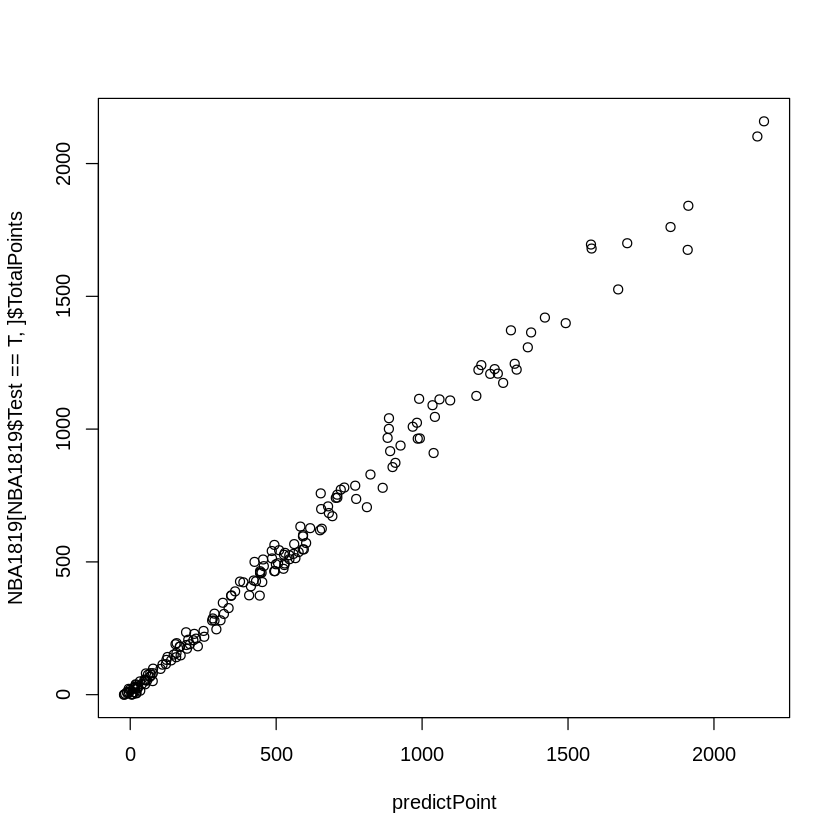

In [42]:
plot(x=predictPoint,y=NBA1819[NBA1819$Test==T,]$TotalPoints)

In [44]:
mydata <- read.csv("https://ncku.ml/WZZQ")
mydata$admit <- factor(mydata$admit) # 類別變項要轉為factor
mydata$rank <- factor(mydata$rank) # 類別變項要轉為factor
mydata$Test<-F #新增一個參數紀錄分組
mydata[sample(1:nrow(mydata),nrow(mydata)/3),"Test"]<-T #隨機取1/3當Test set
c(sum(mydata$Test==F),sum(mydata$Test==T)) # Training set : Test set學生數

#修改一下factor的level: 改成Level 2為錄取,1為不錄取-->Level 2 要放正面答案
mydata$admit<-factor(mydata$admit,levels=c(0,1))

[1] 267 133

In [45]:
mylogit <- glm(admit ~ gre + gpa + rank,

data = mydata[mydata$Test==F,], family = "binomial")
finalFit<-stepAIC(mylogit,direction = "both",trace=FALSE) # 雙向逐步選擇模型
summary(finalFit)


Call:
glm(formula = admit ~ gpa + rank, family = "binomial", data = mydata[mydata$Test == 
    F, ])

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.578  -0.893  -0.632   1.085   2.146  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -4.022      1.437   -2.80  0.00514 ** 
gpa            1.232      0.400    3.08  0.00206 ** 
rank2         -0.641      0.387   -1.66  0.09783 .  
rank3         -1.440      0.427   -3.37  0.00074 ***
rank4         -1.589      0.516   -3.08  0.00207 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 339.9  on 266  degrees of freedom
Residual deviance: 309.8  on 262  degrees of freedom
AIC: 319.8

Number of Fisher Scoring iterations: 4


In [46]:
AdmitProb<-predict(finalFit, # 用Training set做的模型

newdata = mydata[mydata$Test==T,], #Test==T, test data
type="response") #結果為每個人被錄取的機率

head(AdmitProb)

1    2   10   11   13   14 
0.27 0.28 0.54 0.34 0.71 0.30

In [47]:
table(AdmitProb>0.5,mydata[mydata$Test==T,]$admit)

       
         0  1
  FALSE 84 29
  TRUE  11  9